In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Decision Trees

Used to win competetions! 

The root node is the parent of decision nodes and the last nodes, that do not give childs are the leaf nodes

## Learning Process

__Decision 1:__ How to choose what feaature to split on at each node?
Maximize purity ( or minimize impurity )

__Decision 2:__ When do you stop splitting?
1) When a node is 100% one class
2) When splitting a node will result in the tree exceeding a maximum depth
3) When improvements in purity score are below a threshold
4) When number of examples in a node is below a threshold

## Measuring Purity

__Entropy:__
The entropy function is the highest when the set of examples is 50-50 and the value is 1, and lowest the is 0 at the input 0, and 1, denoted conventionally by $\text{H}$

Here, the larger tha value the more impure the set is...

If,
$$p_0 = 1 - p_1$$
Then, 
$$H(p_1) = -p_1 log_2(p_1) - p_0 log_2(p_0)$$

Substituting,
$$H(p_1) = -p_1 log_2(p_1) - (1-p_1) log_2(1-p_1)$$

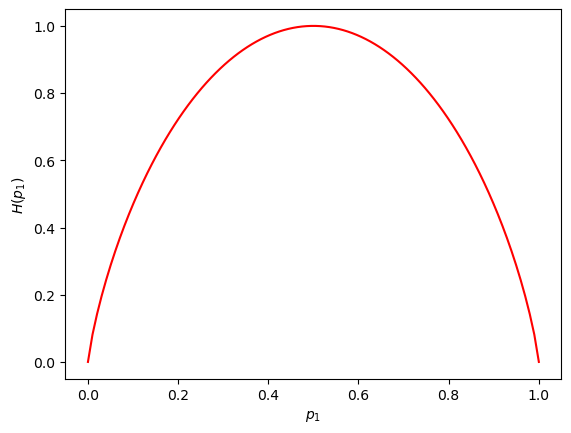

In [8]:
# the equation of the entropy function is
x = np.linspace(1e-12, 1 - 1e-12, 100)
H = -x*np.log2(x) - (1-x)*np.log2(1-x)
plt.xlabel('$p_1$')
plt.ylabel('$H(p_1)$')
plt.plot(x, H, c='r')

## Choosing a split: Information Gain

We try to use that feature which reduces the loos of information the most, that is, it has the least value of the weighted mean of the entropy function and not just the entropy!

let's say, we have the following split... which one do we choose?
1) 5 animals, H = 0.72 and 5 animals, H = 0.72
2) 7 animals, H = 0.99 and 3 animals, H = 0.92
3) 4 animals, H = 0.81 and 6 animals, H = 0.92

For the first example we have:
$$\frac{5}{10}(0.72)+\frac{5}{10}(0.72)=0.72$$
For the second example we have:
$$\frac{7}{10}(0.99)+\frac{3}{10}(0.92)=0.969$$
For the third example we have:
$$\frac{4}{10}(0.81)+\frac{6}{10}(0.92)=0.876$$
For the root node:
$$H(0.5) = 1$$

So as to stick to the convention what we calculate is:
$$H(\text{root node})-(\text{weight mean})$$
So, we get...
1) 0.28
2) 0.03
3) 0.12

These numebers are the information gain/reduction in entropy <br>
and hence we want the most reduction in entropy

## General Formula

#### Information Gain
$\text{Information Gain}:= H(p_1^{\text{root}}) - \bigg(w^{\text{left}}H(p_1^{\text{left}})+w^{\text{right}}H(p_1^{\text{right}})\bigg)$

## Putting it Together
1) Start with all examples at the root node
2) Calculate information gain for all possible features, and pick the one with the highest information gain
3) Split dataset according to selected feature, and create left, and right branches of the tree
4) Keep doing this untill the stopping criteria is met (the ones that were discussed above)

This is a recursive algorithm, and it is obvious so think yourself

## Using one-hot encoding of categorical features

Features that can take on more than two values, can intuitively and wasily be used as a path/root to 3 children nodes, but here we will look at one-hot encoding

Instead of one feature, that could take 4 values, we will take four boolean features

This also works for Neural networks and what we've done till now

## Continuous valued functions

### Splitting on a continuous variable
We will split the data set into two subsets in the way that gives the most information gain

A conventional way to do this is to sort the values on the basis of the feature, say there are 10 training sets for that particualar feature, we will check at every mid point between two features for the best information gain, that is we will check 9 times...

# Regression Trees

It'll first calssify based on the input features, untill it get's to a leaf node, and then outputs the avg value of the elements in the node

### Choosing a split

while building a regression we, rather than reducing the entropy, we reduce the variance of the weights while calculating about what feature to choose

1) First we compute $w^{\text{left}}$ and $w^{\text{right}}$ like we did earlier and then
2) we take the weighted mean of the variances this time, rather than the entropy

Just as the classification problem, we will measure the reduction in variance rather than the variance

# Code Implementation

. X_train: for each example, contains 3 features:

      - Ear Shape (1 if pointy, 0 otherwise)
      - Face Shape (1 if round, 0 otherwise)
      - Whiskers (1 if present, 0 otherwise)

. y_train: whether the animal is a cat

      - 1 if the animal is a cat
      - 0 otherwise

In [10]:
X_train = np.array(
    [[1, 1, 1],
     [0, 0, 1],
     [0, 1, 0],
     [1, 0, 1],
     [1, 1, 1],
     [1, 1, 0],
     [0, 0, 0],
     [1, 1, 0],
     [0, 1, 0],
     [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])


In [12]:
def entropy(p):
    if p==0 or p==1:
        return 0
    else:
        return -p * np.log2(p) - (1- p)*np.log2(1 - p)
    
entropy(0.5)

1.0

In [13]:
def split_indices(X, index_feature):
    left_indices = []
    righit_indices = []
    for  i, x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            righit_indices.append(i)
    return left_indices, righit_indices

In [14]:
split_indices(X_train, 0)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

In [15]:
def weighted_entropy(X, y, left_indices, right_indices):
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)

    weighted_entropy = w_left*entropy(p_left) + w_right*entropy(p_right)
    return weighted_entropy

In [16]:
left_indices, right_indices = split_indices(X_train, 0)
weighted_entropy(X_train, y_train, left_indices, right_indices)

0.7219280948873623

In [17]:
def information_gain(X, y, left_indices, right_indices):
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X, y, left_indices, right_indices)

    return h_node - w_entropy

In [18]:
information_gain(X_train, y_train, left_indices, right_indices)

0.2780719051126377

In [20]:
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")

Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


And do this over and over again